<a href="https://colab.research.google.com/github/samtrrs52/RegresionNoLinealyRegresionLogistica/blob/main/Actividad_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 7.1 (Regresión No Lineal)**

### **Integrantes**: EQUIPO 6
* Said Arturo Flores Nieto A01703477
* José Samuel Torres Pacheco A01707617
* María Fernanda Hernández Elizarraga A01706592
* Paola Plascencia Rey A01707495


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
gyc20 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2020', index_col = 2, header = 5)
gyc21 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2021', index_col = 2, header = 3)
gyc22 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2022', index_col = 2, header = 3)
gyc23 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name = '2023', index_col = 2, header = 3)

In [ ]:
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2020: " + str(len(gyc20)) + "\033[0m")
print(len(gyc20)-gyc20.count())
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2021: " + str(len(gyc21)) + "\033[0m")
print(len(gyc21)-gyc21.count())
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2022: " + str(len(gyc22)) + "\033[0m")
print(len(gyc22)-gyc22.count())
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2023: " + str(len(gyc23)) + "\033[0m")
print(len(gyc23)-gyc23.count())


 DATOS NULOS DE GASTOS Y COSTOS 2020: 3342
FECHA             0
FOLIO           189
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TC              391
IMPORTE          34
IVA             268
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              1
STATUS            0
POLIZA         3321
Columna1          0
dtype: int64

 DATOS NULOS DE GASTOS Y COSTOS 2021: 3035
FECHA             0
FOLIO           147
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TC                0
IMPORTE           0
IVA               0
RET ISR           0
RET IVA           0
TOTAL MX          0
TOTAL SAT         0
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64

 DATOS NULOS DE GASTOS Y COSTOS 2022: 2577
Fecha             0
Folio           102
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC

In [ ]:
gyc20['FOLIO'] = gyc20['FOLIO'].fillna('--')
gyc20['TC'] = gyc20['TC'].fillna('--')
gyc20['POLIZA'] = gyc20['POLIZA'].fillna('--')
gyc20['TIPO'] = gyc20['TIPO'].fillna('--')
gyc20[['IMPORTE', 'IVA', 'GASTO']] = gyc20[['IMPORTE', 'IVA','GASTO']].fillna(0)

gyc21 = gyc21.fillna('--')
gyc22 = gyc22.fillna('--')
gyc23 = gyc23.fillna('--')

In [ ]:
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2020: " + str(len(gyc20)) + "\033[0m")
print(len(gyc20)-gyc20.count())
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2021: " + str(len(gyc21)) + "\033[0m")
print(len(gyc21)-gyc21.count())
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2022: " + str(len(gyc22)) + "\033[0m")
print(len(gyc22)-gyc22.count())
print("\033[1m" + "\n DATOS NULOS DE GASTOS Y COSTOS 2023: " + str(len(gyc23)) + "\033[0m")
print(len(gyc23)-gyc23.count())


 DATOS NULOS DE GASTOS Y COSTOS 2020: 3342
FECHA          0
FOLIO          0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
Columna1       0
dtype: int64

 DATOS NULOS DE GASTOS Y COSTOS 2021: 3035
FECHA          0
FOLIO          0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

 DATOS NULOS DE GASTOS Y COSTOS 2022: 2577
Fecha          0
Folio          0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT

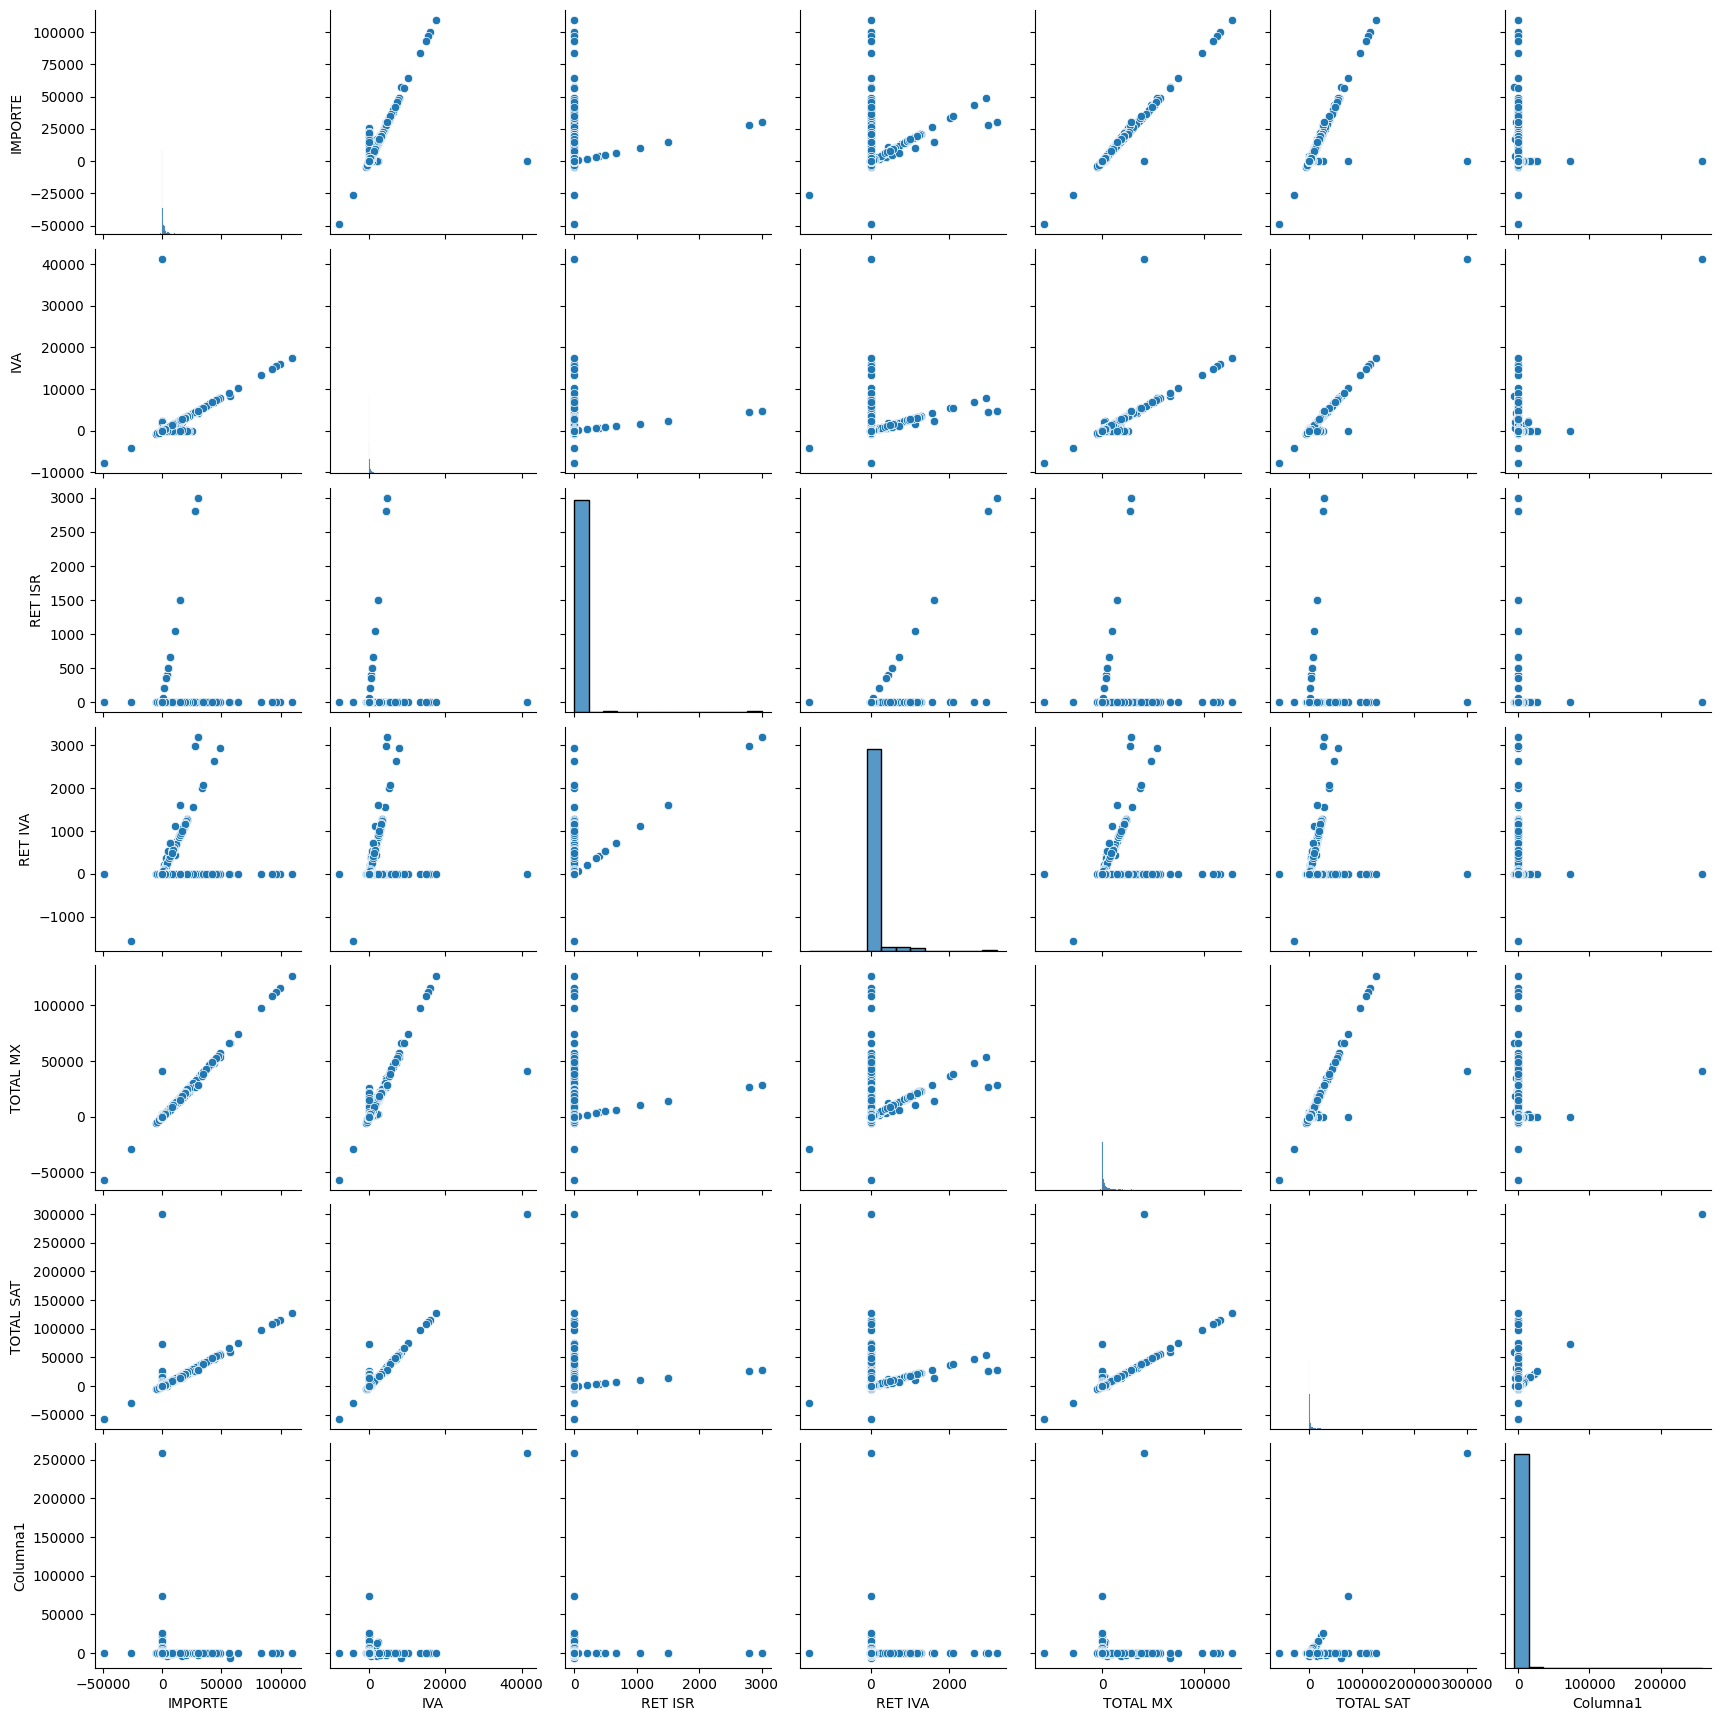

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(gyc20)

In [ ]:
corr = []
det = []
n_m = []

##**2020**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gyc20[['IVA']]
Var_Dep= gyc20['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

###**MODELO 1**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, gyc20['IVA'], gyc20['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.58751480e-04,  8.02350803e+00,  7.56503677e+00])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, gyc20['IVA'], gyc20['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
UUID,
BD20F436-72CC-4BE2-AD37-5999D71AA391,17244.206566
85AEAC2E-6395-44A0-9CB9-754D06893375,635.632291
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,257.743952
EF4504D6-830D-415C-AF03-80CF54C5E28E,13271.637401
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,7.565037
...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,169.655293
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2919.503092
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,217.752126


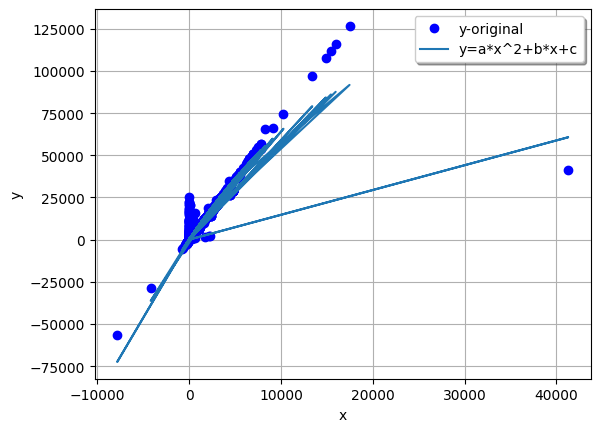

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.9331579819188495

In [ ]:
import numpy as np

det.append(R2)
corr.append(np.sqrt(R2))
n_m.append("M1 2020")

###**MODELO 2**

In [ ]:
def  func2 (x, a, b, c):
     return a*x**3 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs= curve_fit(func2, gyc20['IVA'], gyc20['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-3.64563802e-09,  7.29752802e+00,  1.42702373e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, gyc20['IVA'], gyc20['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2 * x ** 3 + b2 * x + c2

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit2

,IVA
UUID,
BD20F436-72CC-4BE2-AD37-5999D71AA391,16508.157729
85AEAC2E-6395-44A0-9CB9-754D06893375,714.826813
BD0DFE85-D776-41CB-9C5C-4FA7923E687A,370.385137
EF4504D6-830D-415C-AF03-80CF54C5E28E,12611.093093
EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,142.702373
...,...
80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,290.185384
D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,2810.281582
FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,333.970517


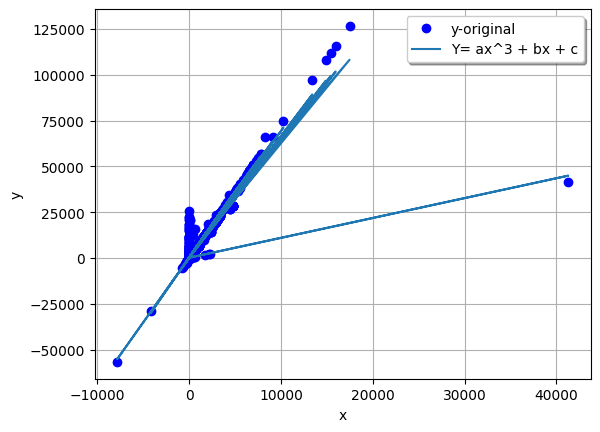

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="Y= ax^3 + bx + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2_2 = r2_score(y, yfit2) 
R2_2

0.9516887387264038

In [ ]:
det.append(R2_2)
corr.append(np.sqrt(R2_2))
n_m.append("M2 2020")

##**2021**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gyc21[['IVA']]
Var_Dep= gyc21['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

###**MODELO 1**

In [ ]:
def  func3 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros3, covs= curve_fit(func3, gyc21['IVA'], gyc21['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros3

array([1.17615828e-05, 6.74758103e+00, 7.08455144e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros3, _ = curve_fit(func3, gyc21['IVA'], gyc21['TOTAL MX'])
a3, b3, c3 = parametros3[ 0 ], parametros3[ 1 ], parametros3[ 2 ]
yfit3 = a3 * x ** 2 + b3 * x + c3

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit3

,IVA
UUID,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,1237.537790
B8AEDE83-CC76-404C-A611-6B5A87BA561F,1080.957455
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,4433.931845
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,6711.070690
C16F79B5-FB35-4BFC-AF84-708B24F500BB,6711.747537
...,...
83F82167-0D14-144E-9D76-045C95F25DDD,708.455144
B1C60AE0-02BC-4A33-9513-A280F72B5D06,708.455144
255F4A25-5753-4208-8F6B-0B59E5AE4741,5475.268792


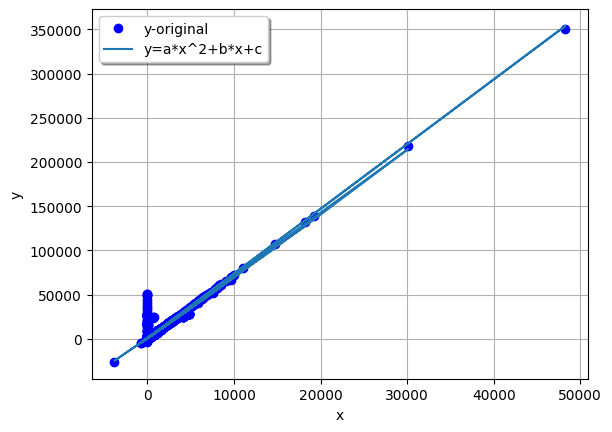

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit3, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2_3 = r2_score(y, yfit3) 
R2_3

0.9028388872975792

In [ ]:
det.append(R2_3)
corr.append(np.sqrt(R2_3))
n_m.append("M1 2021")

###**MODELO 2**

In [ ]:
def  func4 (x, a, b, c):
     return a*x**3 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs= curve_fit(func4, gyc21['IVA'], gyc21['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros4

array([1.87206240e-10, 6.85081279e+00, 6.71137052e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros4, _ = curve_fit(func4, gyc21['IVA'], gyc21['TOTAL MX'])
a4, b4, c4 = parametros4[ 0 ], parametros4[ 1 ], parametros4[ 2 ]
yfit4 = a4 * x ** 3 + b4 * x + c4

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit4

,IVA
UUID,
71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,1208.240865
B8AEDE83-CC76-404C-A611-6B5A87BA561F,1049.301949
19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,4450.008298
EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,6756.297176
C16F79B5-FB35-4BFC-AF84-708B24F500BB,6756.982301
...,...
83F82167-0D14-144E-9D76-045C95F25DDD,671.137052
B1C60AE0-02BC-4A33-9513-A280F72B5D06,671.137052
255F4A25-5753-4208-8F6B-0B59E5AE4741,5504.999302


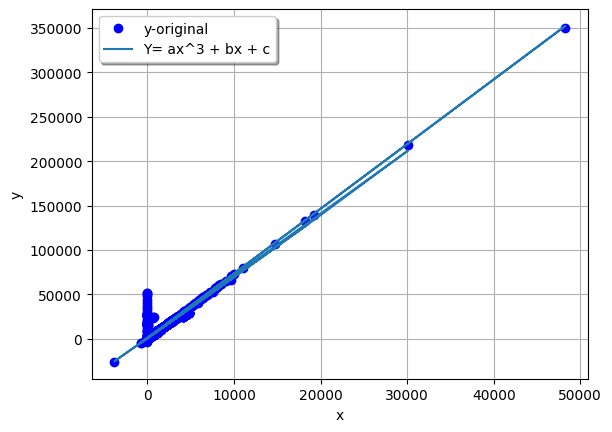

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit4, label="Y= ax^3 + bx + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2_4 = r2_score(y, yfit4) 
R2_4

0.9025848565890544

In [ ]:
det.append(R2_4)
corr.append(np.sqrt(R2_4))
n_m.append("M2 2021")

##**2022**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gyc22[['IVA']]
Var_Dep= gyc22['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

###**Modelo 1**

In [ ]:
def  func5 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros5, covs= curve_fit(func5, gyc22['IVA'], gyc22['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros5

array([1.56201968e-05, 6.58274857e+00, 1.14179660e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros5, _ = curve_fit(func5, gyc22['IVA'], gyc22['TOTAL MX'])
a5, b5, c5 = parametros5[ 0 ], parametros5[ 1 ], parametros5[ 2 ]
yfit5 = a5 * x ** 2 + b5 * x + c5

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
yfit5

,IVA
UUID,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,7001.048855
7E00E776-A839-4D57-B291-411109164B2F,7001.709904
BB6585C1-3B54-4130-AFD0-1867C3764821,1141.796600
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,1141.796600
BB6756D1-6CCD-11EC-947D-00155D014407,1141.796600
...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,1141.796600
D720ED7C-F370-4236-B269-8873ABB78745,4544.765475
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,1141.796600


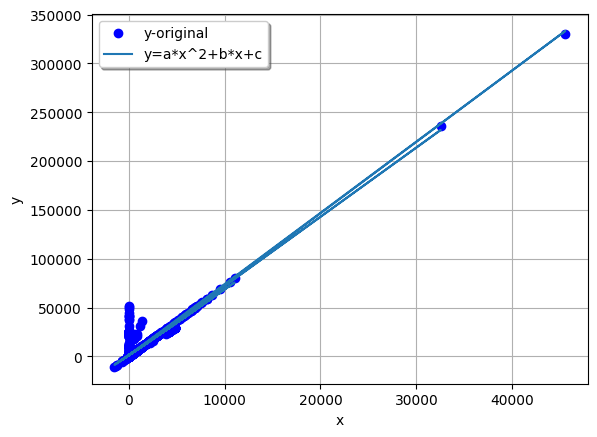

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit5, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_5 = r2_score(y, yfit5) 
R2_5

0.8397849221560656

In [ ]:
det.append(R2_5)
corr.append(np.sqrt(R2_5))
n_m.append("M1 2022")

###**Modelo 2**

In [ ]:
import numpy as np

In [ ]:
def func6(x, a, b, c):
    return a*x**3 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros6, covs= curve_fit(func6, gyc22['IVA'], gyc22['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros6

array([2.85013894e-10, 6.69685179e+00, 1.10956691e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros6, _ = curve_fit(func6, gyc22['IVA'], gyc22['TOTAL MX'])
a6, b6, c6 = parametros6[ 0 ], parametros6[ 1 ], parametros6[ 2 ]
yfit6 = a6 * x ** 3 + b6 * x + c6

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
yfit6

,IVA
UUID,
9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,7058.044333
7E00E776-A839-4D57-B291-411109164B2F,7058.714085
BB6585C1-3B54-4130-AFD0-1867C3764821,1109.566915
B5E4B4EB-6C2F-11EC-BB9D-00155D014009,1109.566915
BB6756D1-6CCD-11EC-947D-00155D014407,1109.566915
...,...
E90DA089-3C3B-45C8-A19C-B8810D222F60,1109.566915
D720ED7C-F370-4236-B269-8873ABB78745,4567.324660
0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,1109.566915


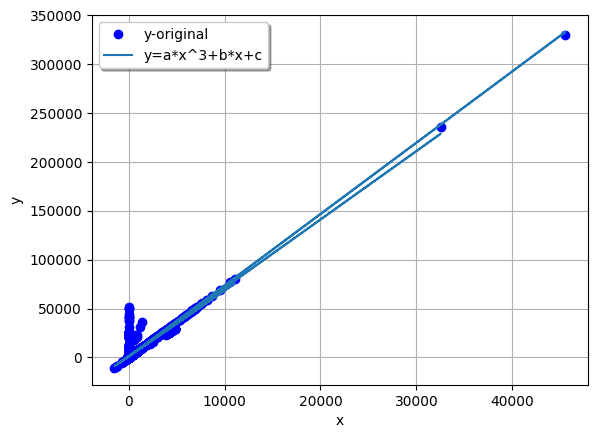

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit6, label="y=a*x^3+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_6 = r2_score(y, yfit6) 
R2_6

0.8395142610165441

In [ ]:
det.append(R2_6)
corr.append(np.sqrt(abs(R2_6)))
n_m.append("M2 2022")

##**2023**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= gyc23[['IVA']]
Var_Dep= gyc23['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

###**Modelo 1**

In [ ]:
def  func7 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros7, covs= curve_fit(func7, gyc23['IVA'], gyc23['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros7

array([1.34872548e-04, 6.02538887e+00, 1.16341135e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros7, _ = curve_fit(func7, gyc23['IVA'], gyc23['TOTAL MX'])
a7, b7, c7 = parametros7[ 0 ], parametros7[ 1 ], parametros7[ 2 ]
yfit7 = a7 * x ** 2 + b7 * x + c7

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
yfit7

,IVA
UUID,
49536321-60A4-523E-A32F-E8BDF5C2276E,1163.411348
20FBB63B-D550-512F-9668-EEC6F983CEB7,1163.411348
DB8C4388-D4E0-4F0C-A09C-77C773257F44,6621.687895
A81A63F5-D5EC-4601-803E-375AF9CC5021,6622.314395
DCC10492-DE51-4C87-8430-5676FBF81931,9560.744299
...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,1163.411348
B7132758-F800-4797-B1D6-CC61AFFEE444,1163.411348
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,5337.942782


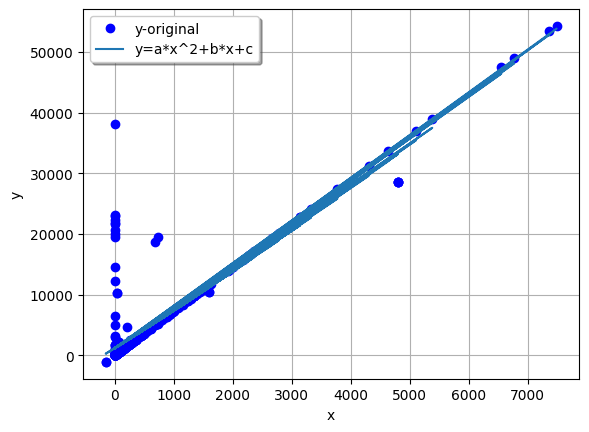

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit7, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_7 = r2_score(y, yfit7) 
R2_7

0.7798823223977879

In [ ]:
det.append(R2_7)
corr.append(np.sqrt(R2_7))
n_m.append("M1 2023")

###**Modelo 2**

In [ ]:
def func8(x, a, b, c):
    return a*x**3 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros8, covs= curve_fit(func8, gyc23['IVA'], gyc23['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros8

array([1.46498330e-08, 6.28014075e+00, 1.12976636e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros8, _ = curve_fit(func8, gyc23['IVA'], gyc23['TOTAL MX'])
a8, b8, c8 = parametros8[ 0 ], parametros8[ 1 ], parametros8[ 2 ]
yfit8 = a8 * x ** 3 + b8 * x + c8

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
yfit8

,IVA
UUID,
49536321-60A4-523E-A32F-E8BDF5C2276E,1129.766355
20FBB63B-D550-512F-9668-EEC6F983CEB7,1129.766355
DB8C4388-D4E0-4F0C-A09C-77C773257F44,6718.178806
A81A63F5-D5EC-4601-803E-375AF9CC5021,6718.810287
DCC10492-DE51-4C87-8430-5676FBF81931,9661.173524
...,...
3E97C399-6747-4BCA-8436-ED4B0933DF33,1129.766355
B7132758-F800-4797-B1D6-CC61AFFEE444,1129.766355
D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,5419.989723


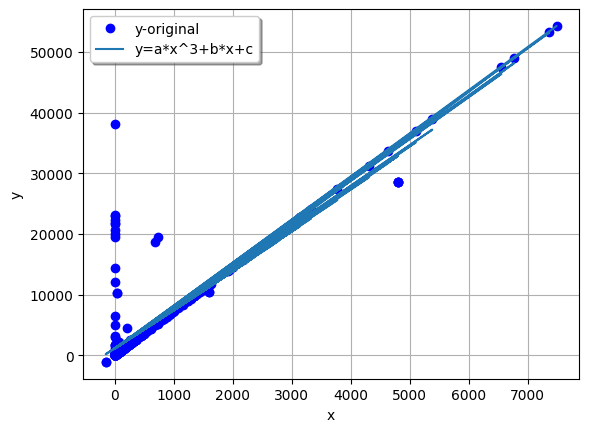

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit8, label="y=a*x^3+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_8 = r2_score(y, yfit8) 
R2_8

0.779886706046094

In [ ]:
det.append(R2_8)
corr.append(np.sqrt(abs(R2_8)))
n_m.append("M2 2023")

##**TABLA**

In [ ]:
tabla = pd.DataFrame()
tabla['Modelo y Año'] = n_m
tabla['Coef. Determinación'] = det
tabla

,Modelo y Año,Coef. Determinación
0,M1 2020,0.933158
1,M2 2020,0.951689
2,M1 2021,0.902839
3,M2 2021,0.902585
4,M1 2022,0.839785
5,M2 2022,0.839514
6,M1 2023,0.779882
7,M2 2023,0.779887
